# The Fibonacci Code

The Fibonacci code is a universal, prefix-free code for encoding positive integers based on the Zeckendorf representation of numbers as sums of Fibonacci numbers.

For a positive integer $n$, the Fibonacci codeword is constructed as follows:

1. Express $n$ as a sum of non-consecutive Fibonacci numbers (Zeckendorf representation).
2. Form a binary string marking which Fibonacci numbers are used (from smallest to largest).
3. Append a terminal `1` to mark the end of the codeword.

The result is a uniquely decodable, prefix-free code.

Example:

- $\text{Fib}(1) = 11$
- $\text{Fib}(2) = 011$
- $\text{Fib}(3) = 0011$
- $\text{Fib}(4) = 1011$
- $\text{Fib}(5) = 00011$

*Note: The terminal `1` ensures the codeword termination.*

In this notebook, we'll implement encoding, decoding, and length functions for the Fibonacci code.


# Imports

In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

# Function Definitions

In this section, we define the core functions for Fibonacci coding:

- `fibonacci_encode`
- `fibonacci_decode`
- `fibonacci_length`
- `fibonacci_implied_probability`

These functions form the foundation for encoding, decoding, and analyzing universal codes throughout this demo.

## `fibonacci_encode`

Encode a positive integer or a sequence of positive integers using Fibonacci coding.

In [2]:
def fibonacci_encode(numbers, collapse=True):
    if not hasattr(fibonacci_encode, "fibonacci_cache"):
        fibonacci_encode.fibonacci_cache = [1, 2]
    fibonacci_cache = fibonacci_encode.fibonacci_cache
    
    def encode(number):
        while fibonacci_cache[-1] < number:
            fibonacci_cache.append(
                fibonacci_cache[-1] + fibonacci_cache[-2]
            )
        
        code_bits = []
        remaining = number
        for fib in reversed(fibonacci_cache):
            if fib > number:
                continue

            if fib <= remaining:
                code_bits.append("1")
                remaining -= fib
            else:
                code_bits.append("0")
        return "".join(reversed(code_bits)) + "1"

    if isinstance(numbers, int):
        return encode(numbers)

    try:
        encoded = [encode(n) for n in numbers]
        return "".join(encoded) if collapse else encoded
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `fibonacci_decode`

Decode a Fibonacci codeword or a sequence of codewords into their corresponding positive integers.

In [3]:
def fibonacci_decode(code, as_list=False):
    if not hasattr(fibonacci_decode, "fibonacci_cache"):
        fibonacci_decode.fibonacci_cache = [1, 2]
    fibonacci_cache = fibonacci_decode.fibonacci_cache
    
    results = []
    index = 0
    message_length = len(code)

    while index < message_length:
        bits = []
        prev = "0"
        while index < message_length:
            bit = code[index]
            bits.append(bit)
            index += 1
            if prev == "1" and bit == "1":
                break
            prev = bit
        else:
            raise ValueError("Malformed Fibonacci code: no terminator found")
        
        if len(bits) == 0:
            raise ValueError("Malformed Fibonacci code: empty representation")

        while len(fibonacci_cache) < len(bits):
            fibonacci_cache.append(fibonacci_cache[-1] + fibonacci_cache[-2])

        value = sum(int(bit) * F_n for bit, F_n in zip(bits, fibonacci_cache))
        results.append(value)

    return results if as_list or len(results) > 1 else results[0]

## `fibonacci_length`

Return the length of the Fibonacci codeword for a positive integer.

In [4]:
def fibonacci_length(numbers, as_list=False):
    def length(number):
        return len(fibonacci_encode(number))

    if isinstance(numbers, int):
        return length(numbers) if not as_list else [length(numbers)]

    try:
        return [length(n) for n in numbers]
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `fibonacci_implied_probability`

Compute the implied probability of Fibonacci codewords.

In [5]:
def fibonacci_implied_probability(numbers, as_list=False):
    def prob(n):
        return np.exp2(-fibonacci_length(n))

    if isinstance(numbers, int):
        return [prob(numbers)] if as_list else prob(numbers)

    try:
        return [prob(n) for n in numbers]
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

# Encoding / Decoding Example

We encode several positive integers, decode them, and compute code lengths.

In [6]:
numbers = [1, 2, 3, 4, 5, 6, [3, 2], [2, 3, 5]]

encoded = [fibonacci_encode(n) for n in numbers]
decoded = [fibonacci_decode(code) for code in encoded]
lengths = [fibonacci_length(n) for n in numbers]
probs = [fibonacci_implied_probability(n) for n in numbers]

results_df = pd.DataFrame(
    list(zip(encoded, decoded, lengths, probs)),
    index=pd.Index(numbers, name="Message"),
    columns=[
        "Fibonacci Codeword", "Decoded", "Codeword Length(s)", "Probability (Implied)"
    ]
)

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(results_df)

,Fibonacci Codeword,Decoded,Codeword Length(s),Probability (Implied)
Message,,,,
1,11,3,2,0.25
2,011,5,3,0.125
3,0011,8,4,0.0625
4,1011,9,4,0.0625
5,00011,13,5,0.03125
6,10011,14,5,0.03125
"[3, 2]",0011011,"[8, 5]","[4, 3]","[0.0625, 0.125]"
"[2, 3, 5]",011001100011,"[5, 8, 13]","[3, 4, 5]","[0.125, 0.0625, 0.03125]"


## Visualizing Fibonacci Code Lengths

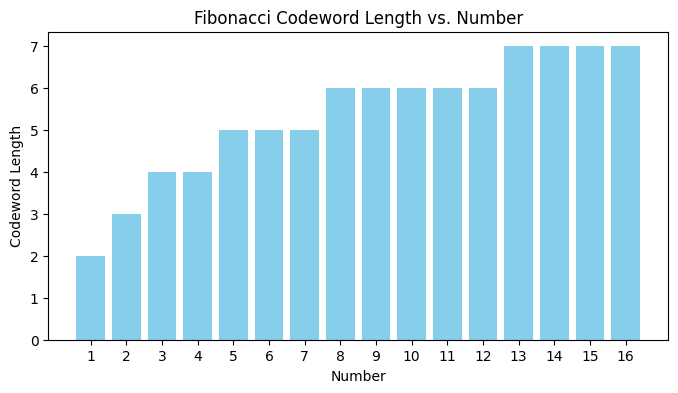

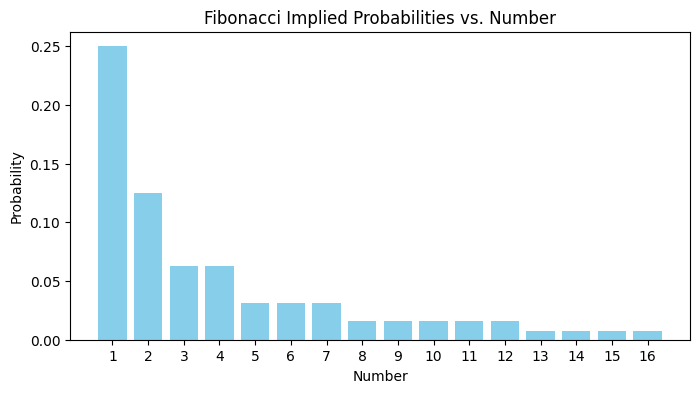

In [7]:
numbers = list(range(1, 17))

code_lengths = [fibonacci_length(n) for n in numbers]
probs = [fibonacci_implied_probability(n) for n in numbers]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, code_lengths, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Codeword Length")
ax.set_title("Fibonacci Codeword Length vs. Number")
ax.set_xticks(numbers)
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, probs, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Probability")
ax.set_title("Fibonacci Implied Probabilities vs. Number")
ax.set_xticks(numbers)
plt.show()

### Notes
- Fibonacci coding relies on the Zeckendorf uniqueness theorem.
- The ending `1` termination guarantees prefix-freeness when appended to the Zeckendorf bits.
- Fibonacci codes are especially efficient when encoding moderately large integers.
- Used in data compression schemes and universal integer coding systems.